In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [5]:
data_path = './data/'
train_df = pd.read_csv(data_path + 'train.csv')
target = 'per_square_meter_price'

/home/orventro/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:xlabel='per_square_meter_price', ylabel='Count'>

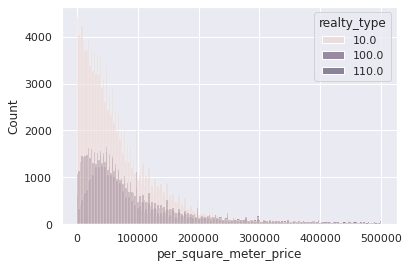

In [6]:
feat = 'realty_type'
df = train_df[[target, feat, 'price_type']].astype(float)
df = df[df[target] < 0.5e6]
sns.histplot(df, x=target, hue=feat)

In [9]:
# feats = ['osm_finance_points_in_0.001', 
#          'osm_finance_points_in_0.005', 
#          'osm_finance_points_in_0.0075', 
#          'osm_finance_points_in_0.01']

def poly_approx_plots(feat, res):
    feats = [feat+r for r in res]
    df = train_df[[target] + feats].astype(float)
#     df_l = df.copy()
#     df_l[target] = np.log1p(df_l[target])*1e6/np.log(1e6)

    for i in range(len(res)):
        sns.lineplot(x=feats[i], y=target, data=df, ci='sd')
#         sns.lineplot(x=feats[i], y=target, data=df_l, ci='sd')
        poly = np.polyfit(df[feats[i]], df[target], 5)
        x = np.linspace(df[feats[i]].min(), df[feats[i]].max())
        plt.plot(x, np.polyval(poly, x))
        plt.show()
        sns.histplot(df, x=feats[i])
        plt.show()

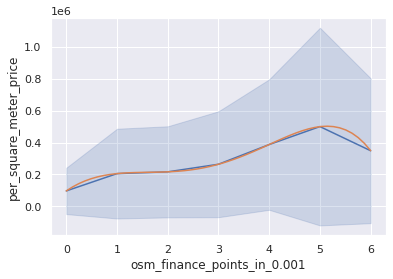

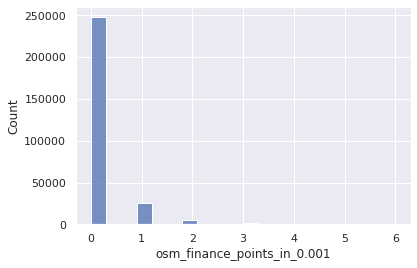

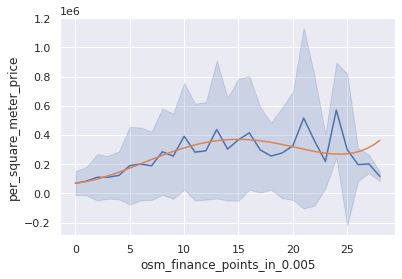

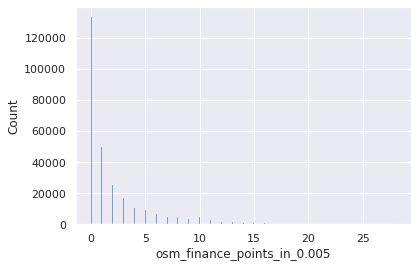

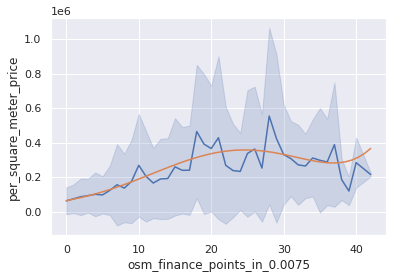

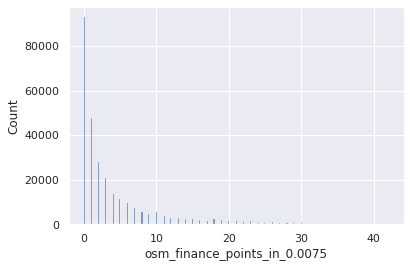

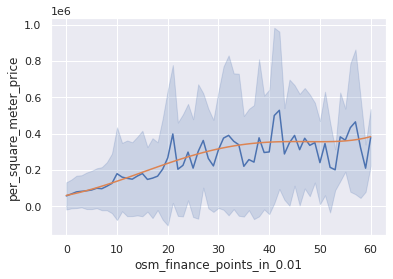

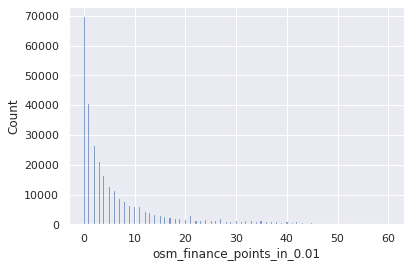

In [10]:
poly_approx_plots('osm_finance_points_in_', ['0.001', '0.005', '0.0075', '0.01'])

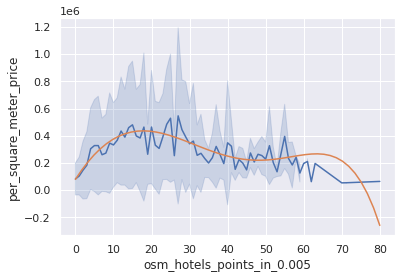

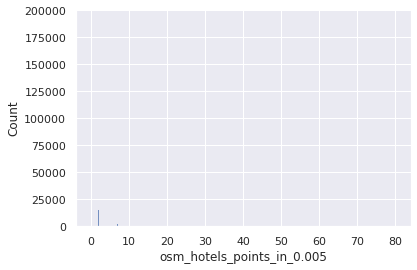

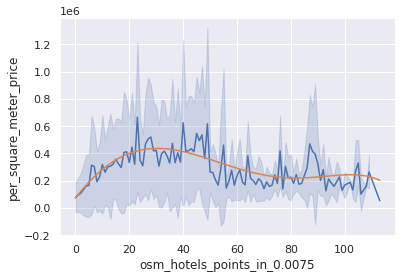

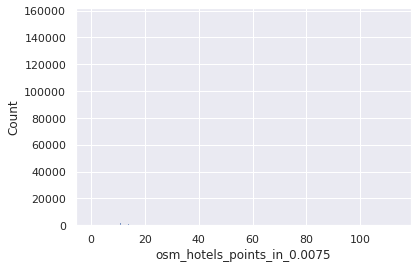

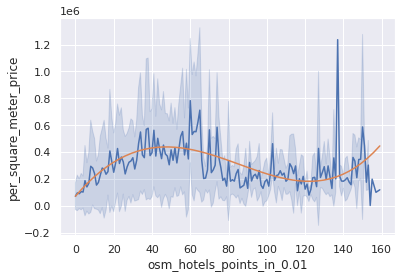

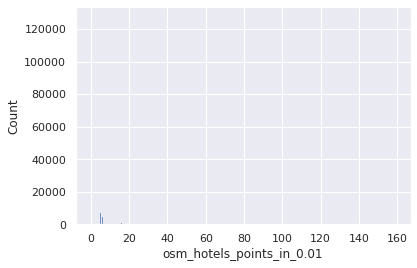

In [11]:
poly_approx_plots('osm_hotels_points_in_', ['0.005', '0.0075', '0.01'])

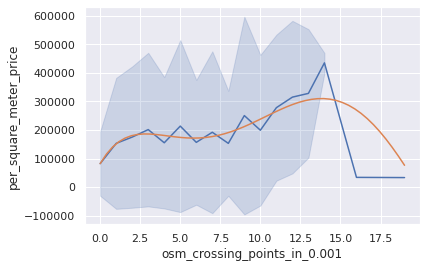

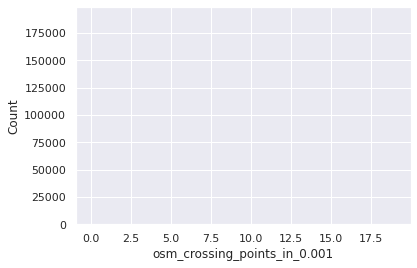

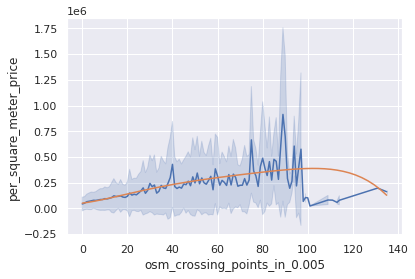

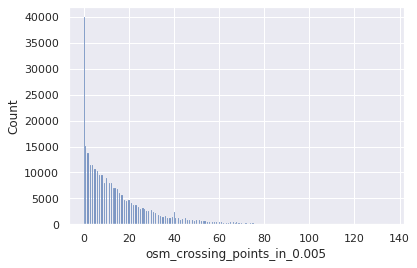

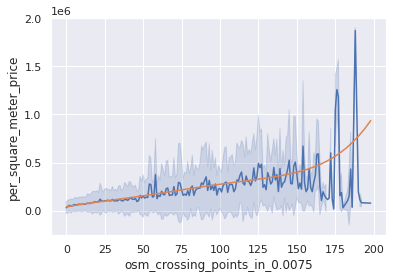

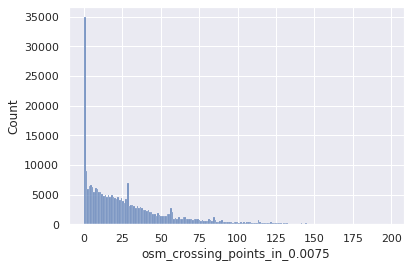

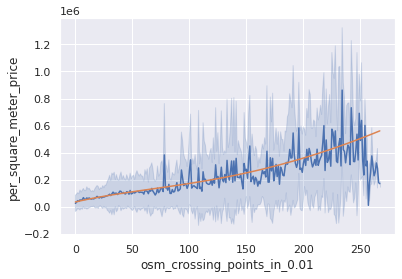

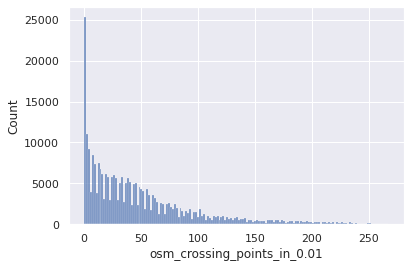

In [12]:
poly_approx_plots('osm_crossing_points_in_', ['0.001', '0.005', '0.0075', '0.01'])

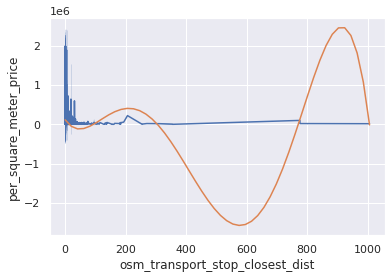

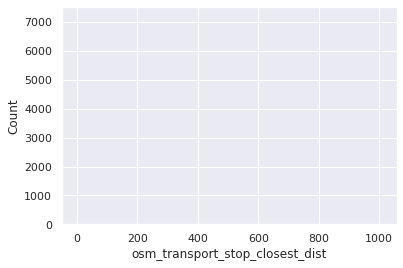

In [13]:
poly_approx_plots('osm_transport_stop_closest_dist', [''])

In [56]:
def binner(feature, bins):
    ans = np.array([len(bins)] * feature.shape[0])
    k = len(bins)
    for b in bins[::-1]:
        k -= 1
        ans[feature <= b] = k
    return ans

In [57]:
binner(np.array([-10, 0, 0, 1, 2, 3, 5, 10, 20]), [0, 1, 2, 10])

array([0, 0, 0, 1, 2, 3, 3, 3, 4])

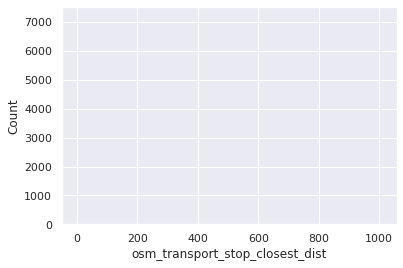

In [15]:
df = train_df[[target, 'osm_transport_stop_closest_dist']].astype(float)
sns.histplot(df, x='osm_transport_stop_closest_dist')
plt.show()